# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [43]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [35]:
# Criar faixas de Latitude
sinasc_raw['Faixa_Latitude'] = sinasc_raw['munResLat'].apply(lambda x: 'Acima de -10.5' if x > -10.5 else 'Abaixo de -10.5')

# Selecionar duas variáveis numéricas que ainda não foram utilizadas
variaveis_numericas = ['APGAR5', 'SEMAGESTAC']  # Exemplo de variáveis

# Aplicar groupby e calcular estatísticas
estatisticas = sinasc_raw.groupby('Faixa_Latitude')[variaveis_numericas].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

# Exibir resultados
print(estatisticas)

                   APGAR5                                                  \
                      sum      mean  min   max median       std       var   
Faixa_Latitude                                                              
Abaixo de -10.5  118403.0  9.138855  0.0  10.0    9.0  0.805385  0.648645   
Acima de -10.5   128746.0  9.216551  0.0  10.0    9.0  0.774741  0.600224   

                SEMAGESTAC                                                    
                       sum       mean   min   max median       std       var  
Faixa_Latitude                                                                
Abaixo de -10.5   482701.0  38.545157  19.0  45.0   39.0  2.012483  4.050089  
Acima de -10.5    511951.0  38.588302  21.0  45.0   39.0  2.020722  4.083319  


### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [36]:
# Criar faixas de área dos municípios
sinasc_raw['Faixa_Area'] = sinasc_raw['munResArea'].apply(lambda x: 'Acima de 3000' if x > 3000 else 'Abaixo de 3000')

# Selecionar duas variáveis numéricas ainda não utilizadas
variaveis_numericas = ['PESO', 'IDADEMAE']  # Exemplo de variáveis

# Aplicar groupby e calcular estatísticas
estatisticas = sinasc_raw.groupby('Faixa_Area')[variaveis_numericas].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

# Exibir resultados
print(estatisticas)

                    PESO                                              \
                     sum         mean  min   max  median         std   
Faixa_Area                                                             
Abaixo de 3000  16799831  3218.358429  258  5720  3245.0  531.532175   
Acima de 3000   70857126  3249.134538  292  5985  3280.0  547.716582   

                             IDADEMAE                                      \
                         var      sum       mean min max median       std   
Faixa_Area                                                                  
Abaixo de 3000  282526.45265   137413  26.324330  11  53   26.0  6.305013   
Acima de 3000   299993.45372   567848  26.038518  12  53   25.0  6.405497   

                           
                      var  
Faixa_Area                 
Abaixo de 3000  39.753192  
Acima de 3000   41.030387  


### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [37]:
# Definir faixas de altitude 
bins = [0, 100, 200, 300, 400, sinasc_raw['munResAlt'].max()]
labels = ['0-100m', '101-200m', '201-300m', '301-400m', '400m+']
sinasc_raw['Faixa_Altitude'] = pd.cut(sinasc_raw['munResAlt'], bins=bins, labels=labels, include_lowest=True)

# Selecionar duas variáveis numéricas ainda não utilizadas
variaveis_numericas = ['CONSULTAS', 'QTDFILVIVO']  # Exemplo de variáveis

# Aplicar groupby e calcular estatísticas
estatisticas = sinasc_raw.groupby('Faixa_Altitude', observed=False)[variaveis_numericas].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

# Exibir resultados
print(estatisticas)

               CONSULTAS                                               \
                     sum      mean min max median       std       var   
Faixa_Altitude                                                          
0-100m             29684  3.341664   1   9    4.0  0.981709  0.963753   
101-200m           43888  3.674481   1   9    4.0  0.655928  0.430242   
201-300m           13787  3.713170   1   9    4.0  0.609180  0.371101   
301-400m            2505  3.667643   1   4    4.0  0.604910  0.365916   
400m+               6798  3.768293   1   9    4.0  0.634184  0.402189   

               QTDFILVIVO                                                  
                      sum      mean  min   max median       std       var  
Faixa_Altitude                                                             
0-100m             9117.0  1.180806  0.0  12.0    1.0  1.239860  1.537253  
101-200m          11889.0  1.023414  0.0  14.0    1.0  1.160265  1.346215  
201-300m           3545.0  0.972832

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


<Figure size 1200x600 with 0 Axes>

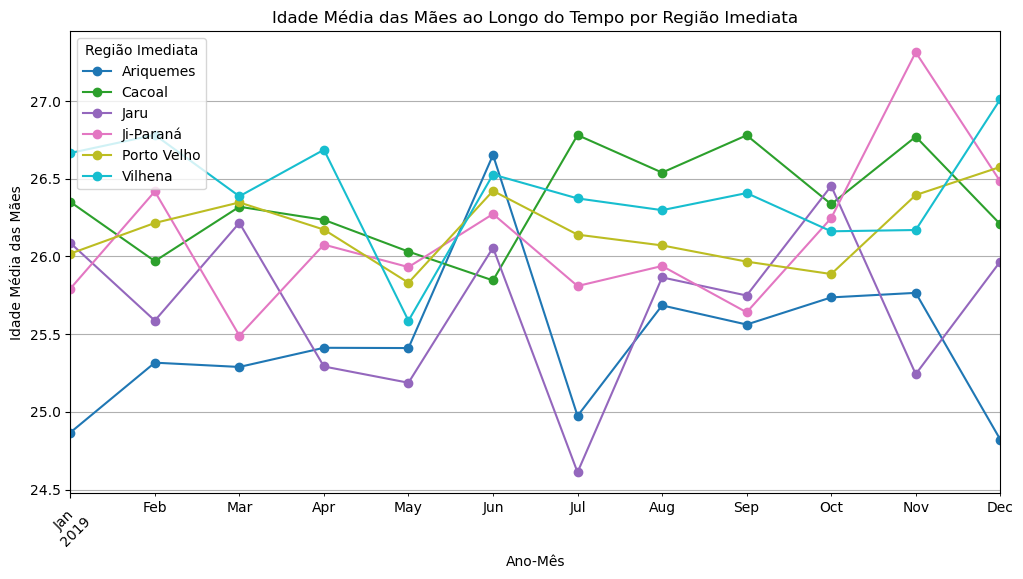

In [44]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

sinasc_raw['Regiao_Imediata'] = sinasc_raw['munResNome'].map(imediatas)

# Garantir que a data está no formato correto
sinasc_raw['DTNASC'] = pd.to_datetime(sinasc_raw['DTNASC'])

# Criar coluna de ano-mês para análise temporal
sinasc_raw['AnoMes'] = sinasc_raw['DTNASC'].dt.to_period('M')

# Calcular a idade média das mães por região imediata ao longo do tempo
idade_media = sinasc_raw.groupby(['AnoMes', 'Regiao_Imediata'])['IDADEMAE'].mean().unstack()

# Plotar o gráfico
plt.figure(figsize=(12, 6))
idade_media.plot(kind='line', marker='o', figsize=(12, 6), colormap='tab10')
plt.xlabel('Ano-Mês')
plt.ylabel('Idade Média das Mães')
plt.title('Idade Média das Mães ao Longo do Tempo por Região Imediata')
plt.legend(title='Região Imediata')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


                mean  median  min  max       std
Faixa_IDH                                       
Alto       26.280332    26.0   12   47  6.415374
Baixo      25.269231    25.0   13   46  6.103193
Médio      25.848191    25.0   11   53  6.372794


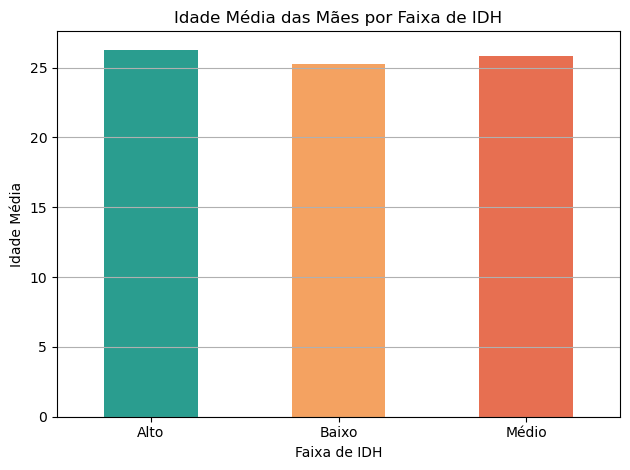

In [45]:
dados_idh = {
    "munResNome": [
        "Porto Velho", "Vilhena", "Cacoal", "Ji-Paraná", "Pimenta Bueno", "Ariquemes", "Rolim de Moura",
        "Cerejeiras", "Jaru", "Colorado do Oeste", "Ouro Preto do Oeste", "Espigão d'Oeste", "Santa Luzia d'Oeste",
        "Pimenteiras do Oeste", "Presidente Médici", "Castanheiras", "Guajará-Mirim", "Chupinguaia", "Cabixi",
        "Candeias do Jamari", "São Felipe d'Oeste", "Cacaulândia", "São Miguel do Guaporé", "Mirante da Serra",
        "Alvorada d'Oeste", "Teixeirópolis", "Nova Brasilândia d'Oeste", "Rio Crespo", "Primavera de Rondônia",
        "Alta Floresta d'Oeste", "Ministro Andreazza", "Novo Horizonte do Oeste", "Vale do Paraíso",
        "Alto Paraíso", "Parecis", "Buritis", "Itapuã do Oeste", "Corumbiara", "Cujubim", "Costa Marques",
        "São Francisco do Guaporé", "Urupá", "Monte Negro", "Seringueiras", "Governador Jorge Teixeira",
        "Machadinho d'Oeste", "Campo Novo de Rondônia", "Alto Alegre dos Parecis", "Theobroma", "Nova União",
        "Nova Mamoré", "Vale do Anari"
    ],
    "IDH": [
        0.736, 0.731, 0.718, 0.714, 0.710, 0.702, 0.700,
        0.692, 0.689, 0.685, 0.682, 0.672, 0.670,
        0.665, 0.664, 0.658, 0.657, 0.652, 0.650,
        0.649, 0.649, 0.646, 0.646, 0.643,
        0.643, 0.643, 0.643, 0.643, 0.641,
        0.641, 0.638, 0.634, 0.627,
        0.625, 0.617, 0.616, 0.614, 0.613, 0.612, 0.611,
        0.611, 0.609, 0.607, 0.598, 0.596,
        0.596, 0.593, 0.592, 0.589, 0.587,
        0.587, 0.584
    ]
}

df_idh = pd.DataFrame(dados_idh)

# Criar faixa com base no valor de IDH
def faixa_idh(valor):
    if valor >= 0.700:
        return 'Alto'
    elif valor >= 0.600:
        return 'Médio'
    else:
        return 'Baixo'

df_idh['Faixa_IDH'] = df_idh['IDH'].apply(faixa_idh)

# Corrigir espaços nos nomes de município
sinasc_raw["munResNome"] = sinasc_raw["munResNome"].str.strip()
df_idh["munResNome"] = df_idh["munResNome"].str.strip()

# Mesclar com o dataframe principal
sinasc_raw = sinasc_raw.merge(df_idh[["munResNome", "Faixa_IDH"]], on="munResNome", how="left")

# Agrupar por faixa de IDH e calcular estatísticas da idade da mãe
idade_maes_por_idh = sinasc_raw.groupby("Faixa_IDH")["IDADEMAE"].agg(["mean", "median", "min", "max", "std"])
print(idade_maes_por_idh)

# Plotar gráfico de barras com idade média das mães por faixa de IDH
idade_maes_por_idh["mean"].plot(kind="bar", color=["#2a9d8f", "#f4a261", "#e76f51"])
plt.title("Idade Média das Mães por Faixa de IDH")
plt.ylabel("Idade Média")
plt.xlabel("Faixa de IDH")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


                 mean  median  min  max       std
Faixa_IFDM                                       
Moderado    26.245598    26.0   12   53  6.394448
Regular     25.432203    25.0   11   52  6.344710


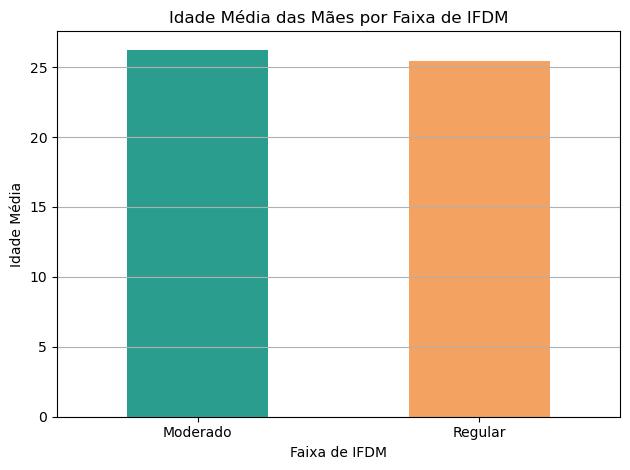

In [46]:
dados_ifdm = {
    "munResNome": [
        "Ariquemes", "Vilhena", "Pimenta Bueno", "Porto Velho", "Ji-Paraná", "Cacoal", "Santa Luzia d'Oeste",
        "Rolim de Moura", "Chupinguaia", "São Miguel do Guaporé", "Pimenteiras do Oeste", "Teixeirópolis",
        "Colorado do Oeste", "Jaru", "Rio Crespo", "Primavera de Rondônia", "Alta Floresta d'Oeste",
        "Ouro Preto do Oeste", "São Francisco do Guaporé", "Candeias do Jamari", "Buritis", "São Felipe d'Oeste",
        "Presidente Médici", "Cerejeiras", "Monte Negro", "Urupá", "Espigão d'Oeste", "Seringueiras",
        "Alvorada d'Oeste", "Itapuã do Oeste", "Cabixi", "Novo Horizonte do Oeste", "Nova Brasilândia d'Oeste",
        "Vale do Paraíso", "Corumbiara", "Alto Paraíso", "Cacaulândia", "Vale do Anari", "Ministro Andreazza",
        "Costa Marques", "Nova União", "Guajará-Mirim", "Mirante da Serra", "Parecis", "Castanheiras",
        "Theobroma", "Machadinho d'Oeste", "Campo Novo de Rondônia", "Nova Mamoré", "Cujubim",
        "Alto Alegre dos Parecis", "Governador Jorge Teixeira"
    ],
    "IFDM": [
        0.7746, 0.7465, 0.7383, 0.7257, 0.7117, 0.7111, 0.6850,
        0.6785, 0.6766, 0.6699, 0.6501, 0.6500, 0.6473, 0.6450, 0.6430, 0.6384, 0.6337,
        0.6261, 0.6214, 0.6199, None, 0.6153, 0.6140, 0.6137, 0.6016, 0.6006,
        0.5973, 0.5922, 0.5919, 0.5903, 0.5887, 0.5858, 0.5857, 0.5818, 0.5759,
        0.5735, 0.5721, 0.5710, 0.5657, 0.5626, 0.5571, 0.5541, 0.5519, 0.5502,
        0.5430, 0.5405, 0.5322, 0.5272, 0.5084, 0.5055, 0.5046, 0.4562
    ]
}

df_ifdm = pd.DataFrame(dados_ifdm)

# Criar faixas com base nos valores
def faixa_ifdm(valor):
    if valor >= 0.8:
        return "Muito alto"
    elif valor >= 0.6:
        return "Moderado"
    else:
        return "Regular"

df_ifdm["Faixa_IFDM"] = df_ifdm["IFDM"].apply(faixa_ifdm)

# Corrigir nomes
sinasc_raw["munResNome"] = sinasc_raw["munResNome"].str.strip()
df_ifdm["munResNome"] = df_ifdm["munResNome"].str.strip()

# Mesclar com o sinasc_raw
sinasc_raw = sinasc_raw.merge(df_ifdm[["munResNome", "Faixa_IFDM"]], on="munResNome", how="left")

# Agrupar e calcular estatísticas da idade da mãe por faixa de IFDM
idade_maes_ifdm = sinasc_raw.groupby("Faixa_IFDM")["IDADEMAE"].agg(["mean", "median", "min", "max", "std"])
print(idade_maes_ifdm)

# Plotar gráfico
idade_maes_ifdm["mean"].plot(kind="bar", color=["#2a9d8f", "#f4a261", "#e76f51"])
plt.title("Idade Média das Mães por Faixa de IFDM")
plt.ylabel("Idade Média")
plt.xlabel("Faixa de IFDM")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


                      mean  median  min  max      std
Faixa_PIB                                            
Até 100 milhões  26.107887    26.0   11   53  6.39321


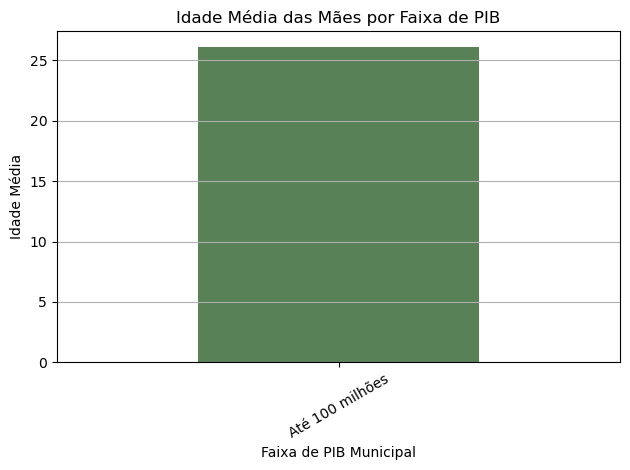

In [47]:
dados_pib = {
    "munResNome": [
        "Porto Velho", "Ji-Paraná", "Vilhena", "Ariquemes", "Cacoal", "Jaru", "Rolim de Moura",
        "Pimenta Bueno", "Guajará-Mirim", "Ouro Preto do Oeste", "Buritis", "Machadinho do Oeste",
        "Espigão d'Oeste", "São Miguel do Guaporé", "Candeias do Jamari", "Nova Mamoré",
        "Cerejeiras", "Alta Floresta do Oeste", "Presidente Médici", "Cujubim", "Nova Brasilândia do Oeste",
        "Alto Paraíso", "São Francisco do Guaporé", "Colorado do Oeste", "Monte Negro",
        "Alto Alegre dos Parecis", "Campo Novo de Rondônia", "Alvorada do Oeste", "Chupinguaia",
        "Corumbiara", "Ministro Andreazza", "Urupá", "Costa Marques", "Seringueiras", "Mirante da Serra",
        "Governador Jorge Teixeira", "Theobroma", "Santa Luzia do Oeste", "Novo Horizonte do Oeste",
        "Itapuã do Oeste", "Vale do Paraíso", "Cacaulândia", "Cabixi", "Vale do Anari", "Nova União",
        "Parecis", "Rio Crespo", "Pimenteiras do Oeste", "Teixeirópolis", "São Felipe do Oeste",
        "Castanheiras", "Primavera de Rondônia"
    ],
    "PIB": [
        17912070, 3783972, 2831175, 2579830, 2261644, 1500890, 1283434,
        1164877, 893000, 834000, 726000, 633000, 625000, 616000, 548000, 529000,
        507000, 496000, 428000, 385000, 360000, 358000, 353000, 335000, 219152,
        213410, 208821, 204098, 190331, 188218, 174633, 172143, 171878, 169429,
        163955, 148027, 140601, 135934, 129399, 129351, 116742, 116635, 113031,
        105208, 92346, 80759, 76854, 76756, 72089, 72084, 59779, 52908
    ]
}

df_pib = pd.DataFrame(dados_pib)

# Faixas baseadas no enunciado
def faixa_pib(valor):
    if valor < 100_000_000:
        return "Até 100 milhões"
    elif valor < 200_000_000:
        return "Acima de 100 mi"
    elif valor < 300_000_000:
        return "Acima de 200 mi"
    elif valor < 500_000_000:
        return "Acima de 300 mi"
    elif valor < 1_000_000_000:
        return "Acima de 500 mi"
    else:
        return "Acima de 1 bi"

df_pib["Faixa_PIB"] = df_pib["PIB"].apply(faixa_pib)

# Corrigir nomes
sinasc_raw["munResNome"] = sinasc_raw["munResNome"].str.strip()
df_pib["munResNome"] = df_pib["munResNome"].str.strip()

# Mesclar
sinasc_raw = sinasc_raw.merge(df_pib[["munResNome", "Faixa_PIB"]], on="munResNome", how="left")

# Agrupar e calcular estatísticas
idade_maes_pib = sinasc_raw.groupby("Faixa_PIB")["IDADEMAE"].agg(["mean", "median", "min", "max", "std"]).sort_index()
print(idade_maes_pib)

# Gráfico
idade_maes_pib["mean"].plot(kind="bar", color="#588157")
plt.title("Idade Média das Mães por Faixa de PIB")
plt.xlabel("Faixa de PIB Municipal")
plt.ylabel("Idade Média")
plt.xticks(rotation=30)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

In [ ]:
A maior parte dos nascimentos ocorre em municípios com baixo PIB e IDH médio